**Data Cleaning and Preprocesssing**

In [42]:
!pip install unidecode

In [43]:
import json
import re
from unidecode import unidecode

In [44]:
class NewsDataCleaner:
    def __init__(self, input_file, output_file):
        self.input_file = input_file
        self.output_file = output_file

    def load_data(self):
        with open(self.input_file, 'r', encoding='utf-8') as file:
            self.data = json.load(file)

    def clean_data(self):
        descriptions_seen = set()
        for entry in self.data:
            if 'articles' in entry:
                cleaned_articles = []
                for article in entry['articles']:
                    # Remove unwanted fields
                    article.pop('url', None)
                    article.pop('urlToImage', None)
                    article.pop('publishedAt', None)
                    article.pop('content', None)

                    # Lowercasing and Unicode normalization
                    article['description'] = unidecode(article['description'].lower())

                    # Remove segments with "..."
                    article['description'] = re.sub(r'\s?[^.]*\.\.\.[^.]*', '', article['description'])

                    # Tokenization (split into words)
                    article['description_tokens'] = re.findall(r'\w+|[.,!?;:]', article['description'])

                    # Remove duplicate descriptions
                    if article['description'] not in descriptions_seen:
                        descriptions_seen.add(article['description'])
                        cleaned_articles.append(article)
                entry['articles'] = cleaned_articles

    def save_cleaned_data(self):
        with open(self.output_file, 'w', encoding='utf-8') as file:
            json.dump(self.data, file, indent=4)

    def process(self):
        self.load_data()
        self.clean_data()
        self.save_cleaned_data()

In [45]:
input_file = '/content/news_articles.json'
output_file = '/content/cleaned_data.json'
cleaner = NewsDataCleaner(input_file, output_file)
cleaner.process()
print(f"Data has been cleaned and saved to {output_file}")

Data has been cleaned and saved to /content/cleaned_data.json


**Data Exploration**

In [46]:
import json
from collections import Counter
import matplotlib.pyplot as plt

In [47]:
class NewsDataAnalyzer:
    def __init__(self, input_file):
        self.input_file = input_file

    def load_data(self):
        with open(self.input_file, 'r', encoding='utf-8') as file:
            self.data = json.load(file)

    def max_sentence_length(self):
        max_length = 0
        for entry in self.data:
            if 'articles' in entry:
                for article in entry['articles']:
                    sentences = article['description'].split('.')
                    max_length = max(max_length, *[len(sentence.split()) for sentence in sentences])
        return max_length

    def number_of_data(self):
        count = 0
        for entry in self.data:
            if 'articles' in entry:
                count += len(entry['articles'])
        return count

    def source_frequency(self):
        sources = []
        for entry in self.data:
            if 'articles' in entry:
                sources.extend(article['source']['name'] for article in entry['articles'] if 'source' in article and 'name' in article['source'])
        return Counter(sources)

    def plot_source_frequency(self, frequency):
        names = list(frequency.keys())
        counts = list(frequency.values())

        plt.figure(figsize=(10, 6))
        plt.bar(names, counts, color='skyblue')
        plt.xlabel('Source Name')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.title('Frequency of Source Names in the Dataset')
        plt.tight_layout()
        plt.show()

    def analyze(self):
        self.load_data()
        max_length = self.max_sentence_length()
        data_count = self.number_of_data()
        source_freq = self.source_frequency()

        print(f"Maximum length of a sentence in the dataset: {max_length} words")
        print(f"Number of data entries: {data_count}")
        print(f"Frequency of sources: {source_freq}")

        self.plot_source_frequency(source_freq)

Maximum length of a sentence in the dataset: 45 words
Number of data entries: 843
Frequency of sources: Counter({'The Verge': 424, 'BBC News': 215, 'TechCrunch': 203, 'Reuters': 1})


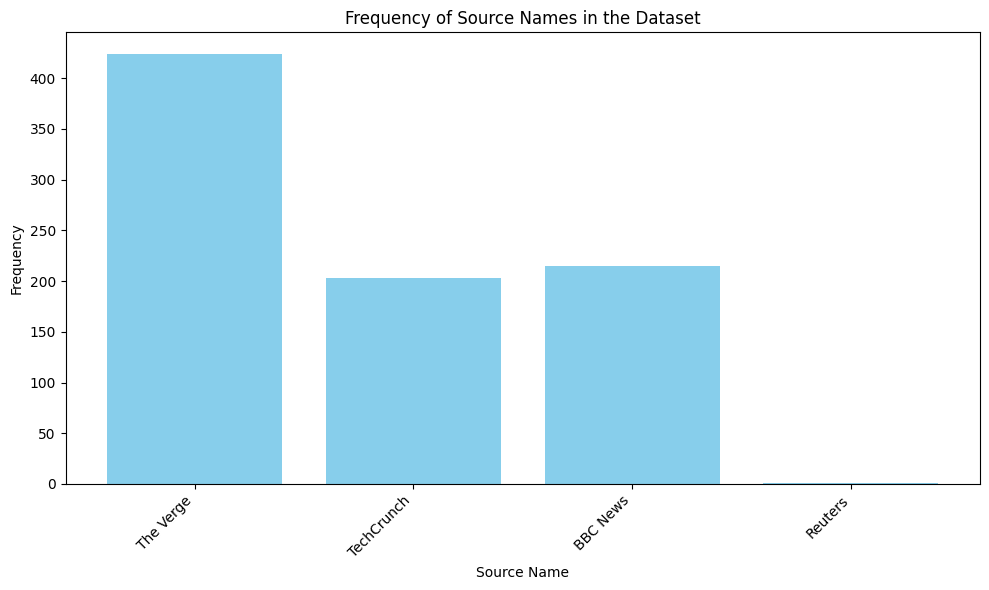

In [48]:
input_file = "/content/cleaned_data.json"

analyzer = NewsDataAnalyzer(input_file)
analyzer.analyze()